In [1]:
import os, sys, glob
from pathlib import Path
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

import geopandas as gpd

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [9]:
root = Path('/home/alal/Dropbox/1_Research/India_Forests/')
#%% Read in data
code = root/'Code'
data = root/'Data'

In [10]:
mining_atlas = data/'Admin/india-mines/atlas_clean.dta'
atlas = pd.read_stata(mining_atlas)
atlas.head()

,metal_class,mineral,state,sheet_no,district,locality,latlong,symbol,rock_type,rock_age,deposit_size,remark,page,latitude,longitude,gsi_deposit_id
0,Iron and Ferro-Alloy Metals,chromite,ANDAMAN ISLANDS,24a,North Andaman,34. Khalighati,13^07' : 92^58',Cr,Ophiolite,Mesozoic,1,,1.0,13.116667,92.966667,1.0
1,Iron and Ferro-Alloy Metals,chromite,ANDAMAN ISLANDS,24a,South Andaman,35. Beadonabad and Chidiyatapu,11^32' : 92^43',Cr,Ophiolite,Mesozoic,1,,1.0,11.533334,92.716667,2.0
2,Iron and Ferro-Alloy Metals,chromite,ANDAMAN ISLANDS,24a,Rutland Island,36. Port Man Bay,11^22' : 92^40',Cr,Ophiolite,Mesozoic,3,,1.0,11.366667,92.666664,3.0
3,Iron and Ferro-Alloy Metals,chromite,ANDHRA PRADESH,18,Khammam dist.,37. Linganapeta,17^15' : 80^25',Cr,Ultramafic intrusion in Peninsular Gneissic Co...,Mesozoic,3,"Khammam-Krishna Chromite Belt No 37,38,40",1.0,17.250000,80.416664,4.0
4,Iron and Ferro-Alloy Metals,chromite,ANDHRA PRADESH,18,Khammam dist.,38. Shriranigiri,17^20' : 80^24',Cr,Ultramafic intrusion in Peninsular Gneissic Co...,Mesozoic,3,,1.0,17.333334,80.400002,5.0


In [7]:
atlas.mineral.value_counts()

limestone                   473
bauxite                     263
clay                        234
copper                      173
hematite                    166
fire clay                   133
dolomite                    124
manganese                   119
quartz glass/silica sand    111
mica                         78
magnetite                    69
coal                         55
gold                         52
asbestos                     45
lead                         43
ochre                        40
gypsum                       40
chromite                     40
talc                         34
magnesite                    32
barite                       25
graphite                     18
phosphorite                  15
tungsten                     14
salt                         14
diamond                      14
titanium                     14
sillimanite                  13
feldspar                     12
potash                        9
apatite                       9
nickel  

## Village data

In [11]:
vil = gpd.read_file(data/'Spatial/Processed/vil_points.shp')

In [15]:
vil.shape
mines.shape

(393577, 134)

(2546, 17)

# Spatial

In [12]:
mines = gpd.GeoDataFrame(atlas, geometry = gpd.points_from_xy(atlas.longitude, atlas.latitude))

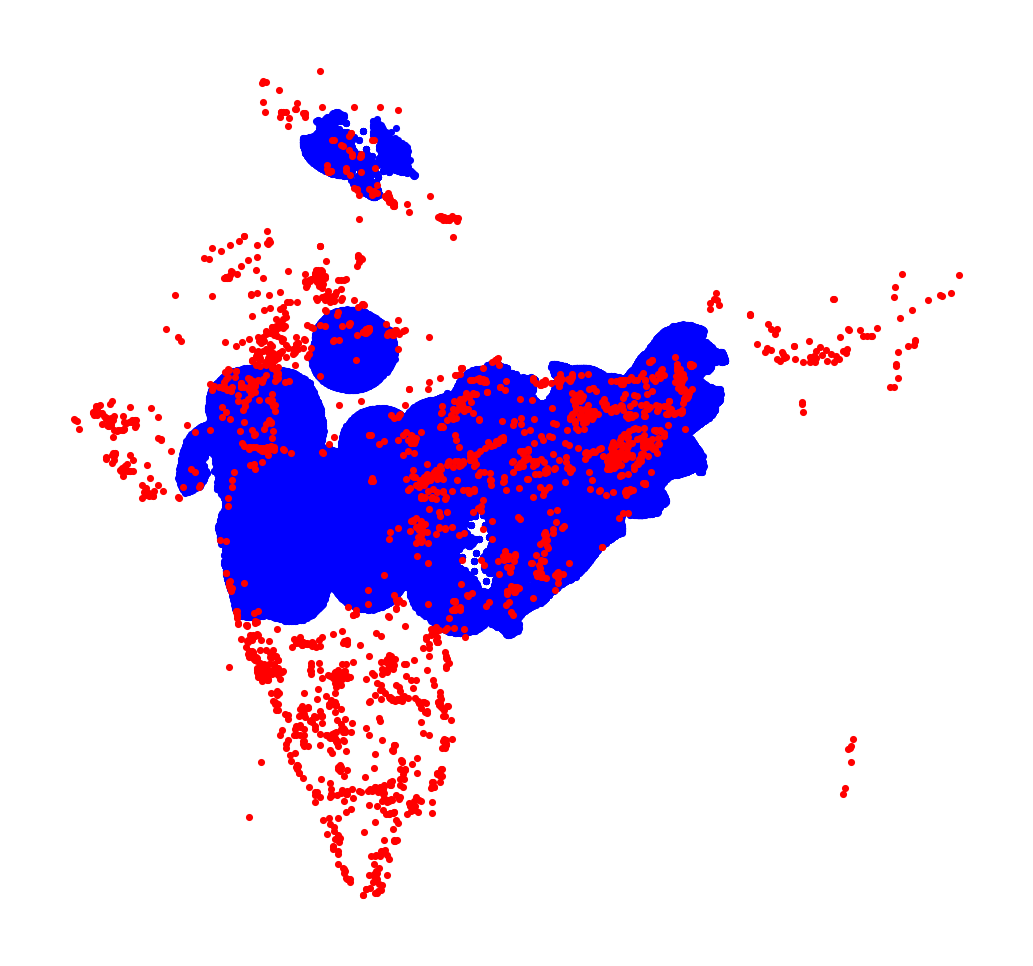

In [13]:
f, ax = plt.subplots(1, dpi = 300)
vil.plot(markersize = .5, facecolor = 'b', ax = ax)
mines.plot(markersize = .5, facecolor = 'r', ax = ax)
ax.set_axis_off()